In [1]:
import seaborn as sns 
import pandas as pd 

In [127]:
#importing data using pandas
df = pd.read_csv('sales_with_nans.csv')

In [6]:
#exploring the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [7]:
#figuring out how many empty values are in each field 
df.isna().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [13]:
#dropping rows that have empty values
df_d = df.dropna(subset=['Customer_Segment', 'Group', 'Sales_After', 'Sales_Before', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Purchase_Made' ])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412 entries, 1 to 9992
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         3412 non-null   object 
 1   Customer_Segment              3412 non-null   object 
 2   Sales_Before                  3412 non-null   float64
 3   Sales_After                   3412 non-null   float64
 4   Customer_Satisfaction_Before  3412 non-null   float64
 5   Customer_Satisfaction_After   3412 non-null   float64
 6   Purchase_Made                 3412 non-null   object 
dtypes: float64(4), object(3)
memory usage: 213.2+ KB


In [19]:
#creating a pivot table to see if the campaign had an affect on sales and customer satisfaction
group_mod_colour4 = df_d.groupby('Group').agg(
    avg_sales_before=('Sales_Before', 'mean'),
    avg_sales_after=('Sales_After', 'mean'),
    avg_sat_before=('Customer_Satisfaction_Before', 'mean'),
    avg_sat_after=('Customer_Satisfaction_After', 'mean'),
    num_sales=('Purchase_Made', 'count'),
).reset_index()
group_mod_colour4.head(20)

,Group,avg_sales_before,avg_sales_after,avg_sat_before,avg_sat_after,num_sales
0,Control,203.413349,243.229615,70.480401,74.199256,1702
1,Treatment,204.349375,317.851870,70.036999,73.716707,1710


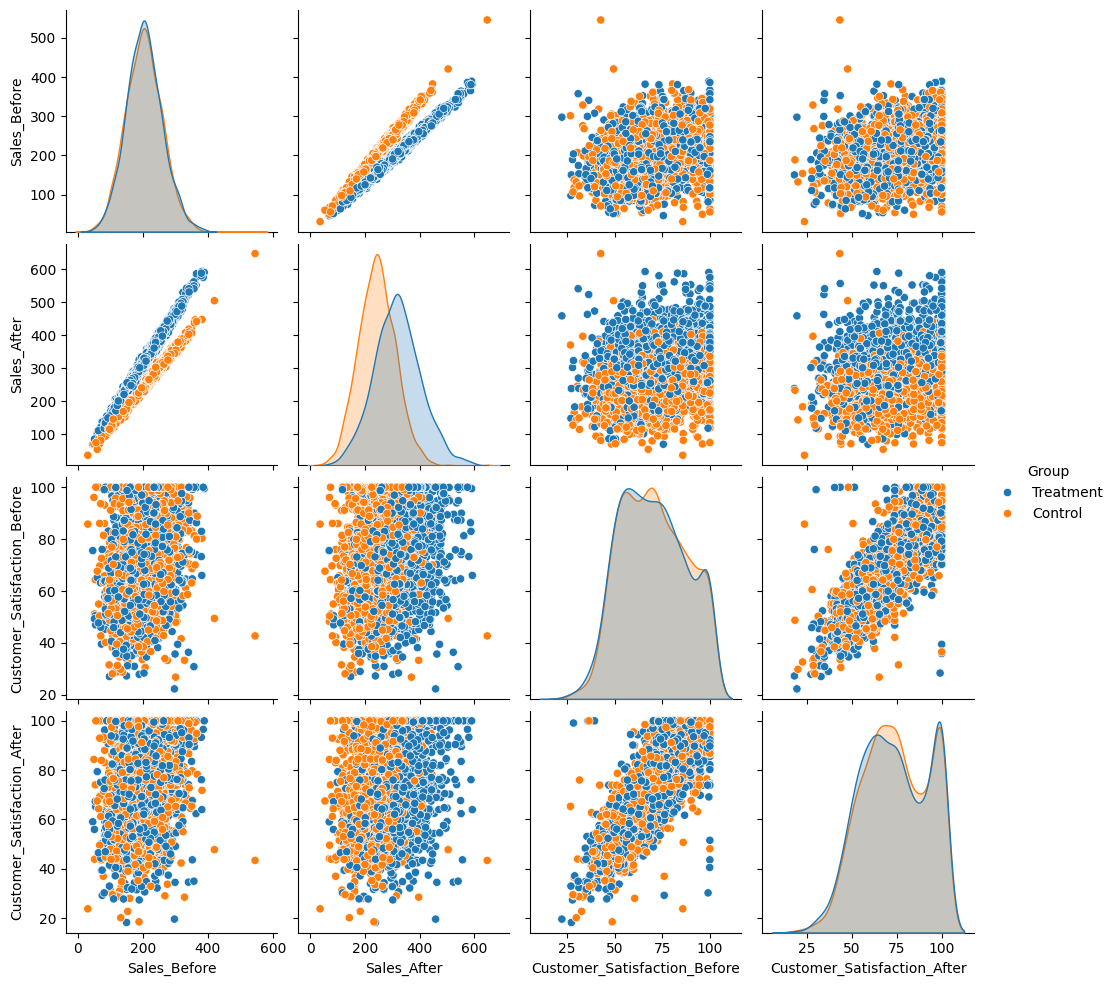

In [24]:
#exploratory analysis using pairplots
sns.pairplot(df_d, hue='Group')

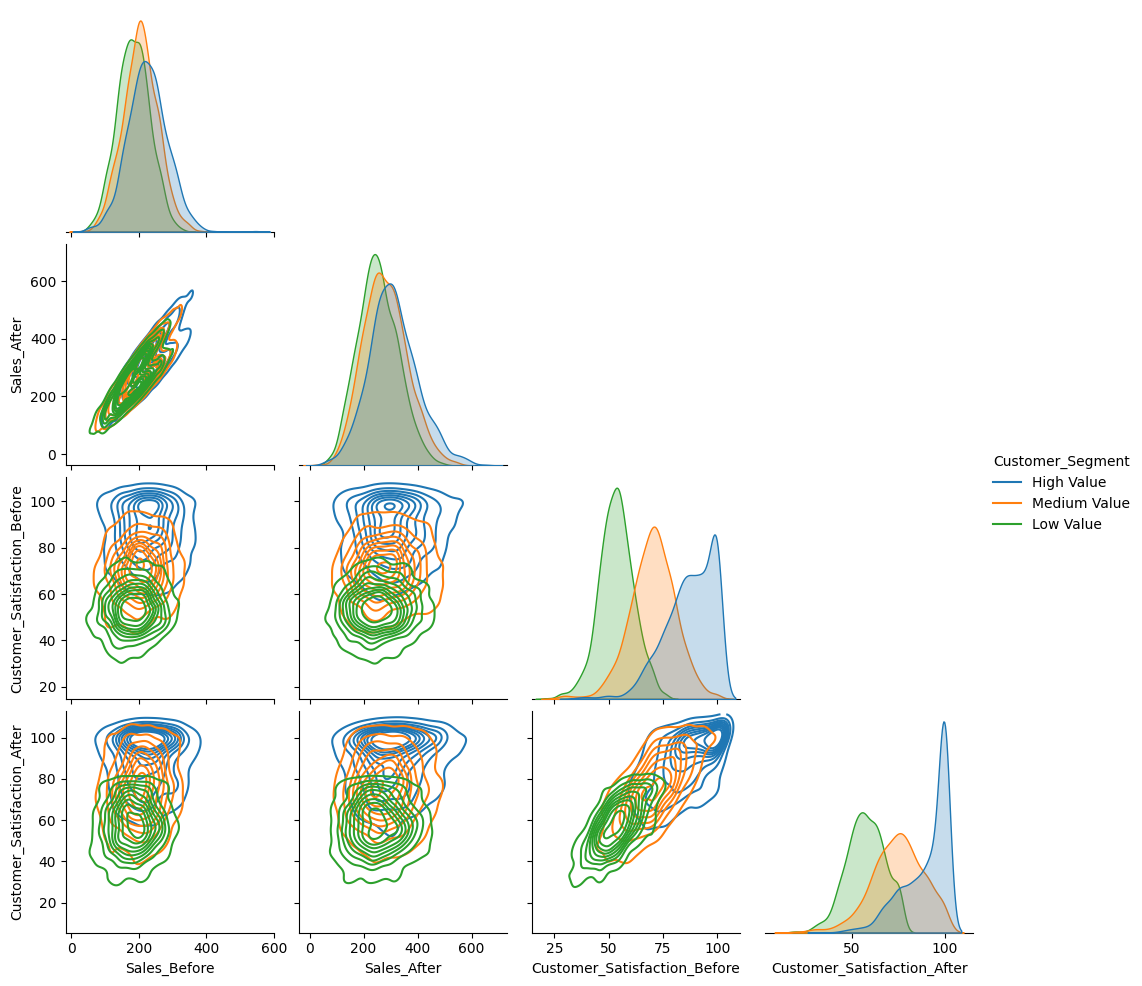

In [28]:
#kde exploratory analysis using pairplots
sns.pairplot(df_d, hue='Customer_Segment', kind='kde', corner=True)

In [33]:
#exploratory analysis with a heat map to spot any quick correlations 
import matplotlib.pyplot as plt 

numeric_cols = df_d.select_dtypes(include='number')

<Axes: >

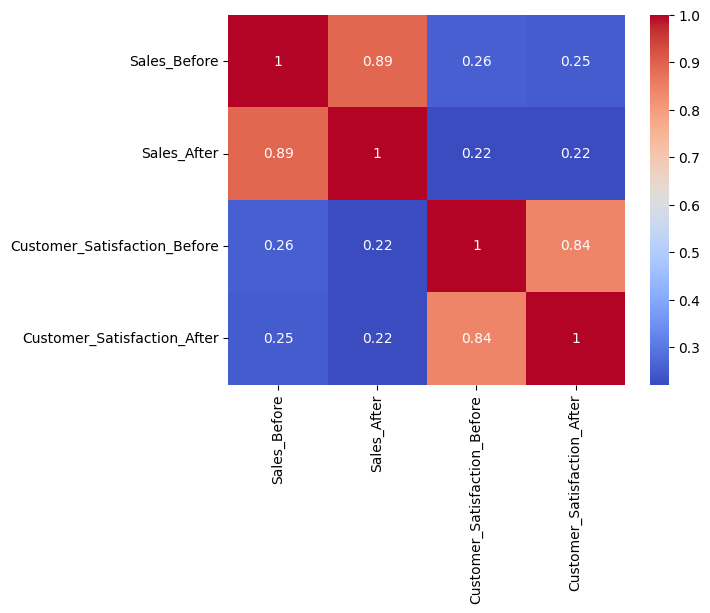

In [35]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')

Text(0.5, 0.98, 'Sales by Customer Group')

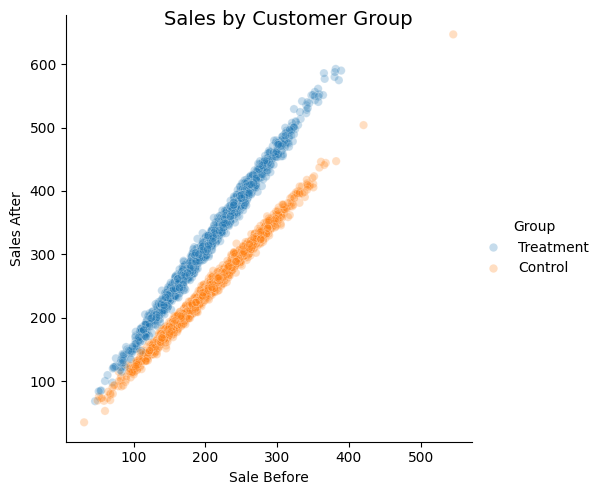

In [118]:
#a vis to see the correlation between sales made before the campaign and sales after the campaign by customer group 

#creating scatter plot 
sp = sns.relplot(data=df_d, x='Sales_Before', y='Sales_After', hue='Group', alpha=.25 )

#create axis labes and title
sp.set_axis_labels("Sale Before", "Sales After")

sp.fig.suptitle("Sales by Customer Group", fontsize=14)
#sp.despine(trim=True)


/var/folders/v_/_gv59nmd53b14j_z_w8ck84c0000gn/T/ipykernel_53697/3091415032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(


Text(0.5, 1.0, 'The Amount of Purchases That Were Made By The Control vs Treatment Group')

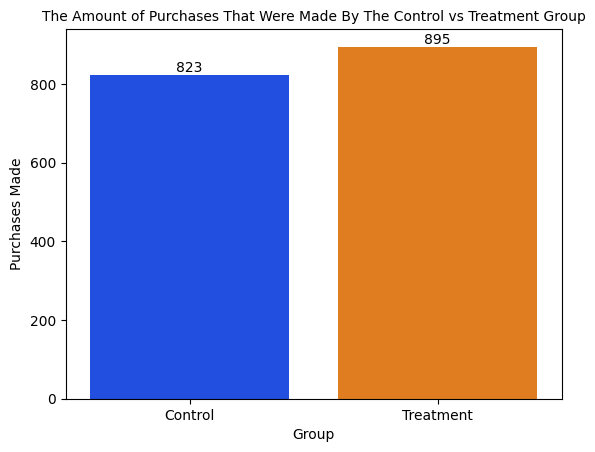

In [116]:
#a vis to see how many purchases were made by the control and treatment group 

#Filtering for only customers that made purchases
df_true = df_d[df_d['Purchase_Made'] == 'Yes']

#grouping by the customer group and aggregating by the no. of purchases made
g=sns.barplot(
    data=df_true.groupby('Group', as_index=False)['Purchase_Made'].count(),
    x='Group',
    y='Purchase_Made',
    palette='bright'
)

#adding data labels to each bar
for container in g.containers:      # loop through each BarContainer
    g.bar_label(container, fontsize=10)
    
#styling elements 
g.set_ylabel("Purchases Made")
#g.legend.set_title("")
g.set_title("The Amount of Purchases That Were Made By The Control vs Treatment Group", fontsize=10)

Text(0.5, 1.0, 'The Amount of Purchases That Were Made By Different Customer Segments')

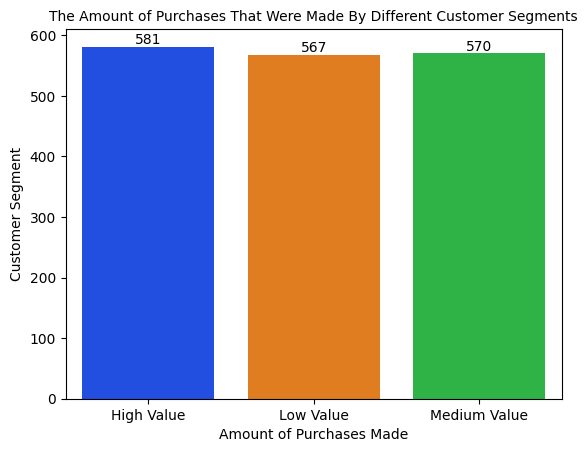

In [109]:
# #a vis to see how many purchases were made by the different types of customers  

# df_true = df_d[(df_d['Purchase_Made'] == 'Yes')]


# g=sns.barplot(
#     data=df_true.groupby('Customer_Segment', as_index=False)['Purchase_Made'].count(),
#     x='Customer_Segment',
#     y='Purchase_Made',
#     palette='bright',
#     hue='Customer_Segment'
# )

# for container in g.containers:      # loop through each BarContainer
#     g.bar_label(container, fontsize=10)
    
# g.set_xlabel("Amount of Purchases Made")
# g.set_ylabel("Customer Segment")
# #g.legend.set_title("")
# g.set_title("The Amount of Purchases That Were Made By Different Customer Segments", fontsize=10)



Text(0.5, 1.0, 'The Amount of Purchases That Were Made By Different Customer Segments in the Treatment Group')

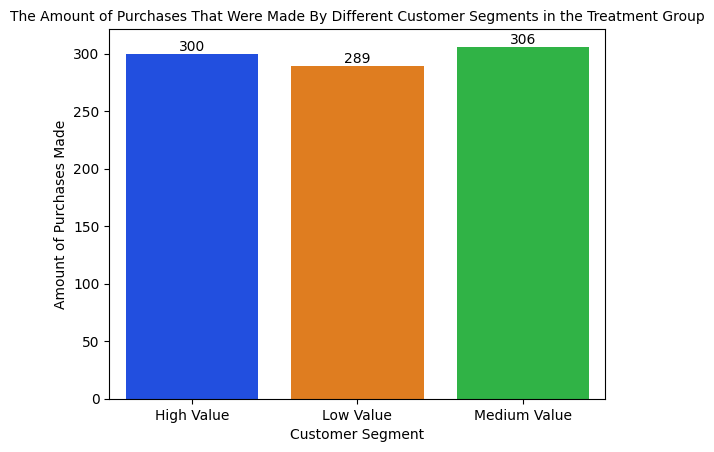

In [111]:
#a vis to see how many purchases were made by the different types of customers  

#filtering for customers that mad a purchase and were exposed to the treatment/campaign
df_true = df_d[(df_d['Purchase_Made'] == 'Yes') & (df_d['Group'] == 'Treatment')]

#Creating barplot, goruping by customer segment and aggregating by the no. of purchases
g1=sns.barplot(
    data=df_true.groupby('Customer_Segment', as_index=False)['Purchase_Made'].count(),
    x='Customer_Segment',
    y='Purchase_Made',
    palette='bright',
    hue='Customer_Segment'
)

#creating data labels for each bar
for container in g.containers:      # loop through each BarContainer
    g1.bar_label(container, fontsize=10)

#styling elements
g1.set_xlabel("Customer Segment")
g1.set_ylabel("Amount of Purchases Made")
#g.legend.set_title("")
g1.set_title("The Amount of Purchases That Were Made By Different Customer Segments in the Treatment Group", fontsize=10)

Text(0.5, 0.98, 'Post-Campaign Sales Per Customer and Group type')

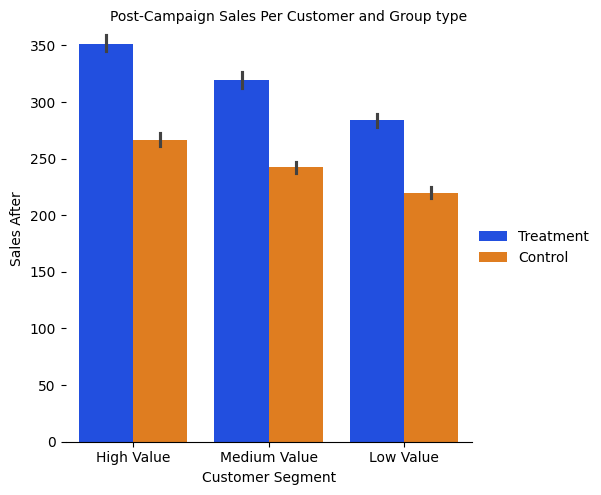

In [90]:
#a vis to see the affect of the campaign on sales in different customer groups 

#creating a catplot 
g=sns.catplot(
    data=df_d, kind='bar',
    x='Customer_Segment', y='Sales_After', hue='Group', palette='bright'
)

#styling elements
g.despine(left=True)
g.set_axis_labels("Customer Segment", "Sales After")
g.legend.set_title("")
g.fig.suptitle("Post-Campaign Sales Per Customer and Group type", fontsize=10)


Text(0.5, 1.0, 'KDE of Customer Sales & Satisfaction After Campaign')

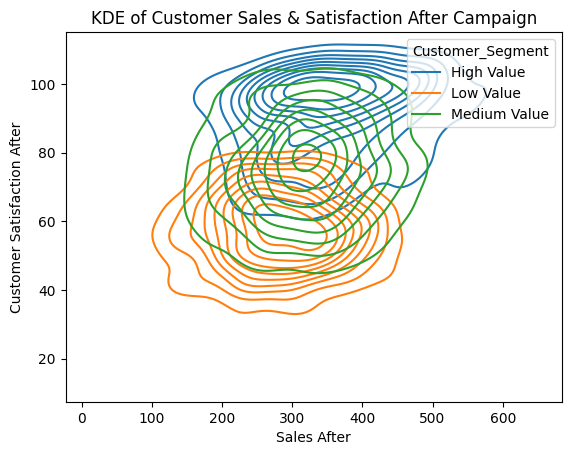

In [126]:
#Filtering by customers who were exposed to the treatment 
df_true = df_d[(df_d['Group'] == 'Treatment')]

#creating the kde plot
kde_graph = sns.kdeplot(
    data=df_true, 
    x='Sales_After', y='Customer_Satisfaction_After', 
    hue='Customer_Segment',
    thresh=.1,
)

#styling elements
kde_graph.set_xlabel("Sales After")
kde_graph.set_ylabel("Customer Satisfaction After")
kde_graph.set_title("KDE of Customer Sales & Satisfaction After Campaign")


In [78]:
#IGNORE BELOW
# import altair as alt

# alt.Chart(df_d).mark_rect().encode(
#     alt.X('Sales_Before:Q').bin(maxbins=50),
#     alt.Y('Sales_After:Q').bin(maxbins=50),
#     alt.Color('count():Q').scale(scheme='greenblue')
# )

alt.Chart(...)